In [1]:
#import libraries you may need 
import pandas as pd 
import numpy as np 
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
from scipy import stats

# About this dataset
This is a source dataset for a Let's Get Healthy California indicator at "https://letsgethealthy.ca.gov/." This table displays the proportion of adults who were ever told they had a depressive disorder in California. It contains data for California only. The data are from the California Behavioral Risk Factor Surveillance Survey (BRFSS). The California BRFSS is an annual cross-sectional health-related telephone survey. 

This indicator is based on the question: "“Has a doctor, nurse or other health professional EVER told you that you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?” 

Source: http://www.csus.edu/research/phsrp/brfss.html
Last updated at https://data.chhs.ca.gov : 2019-11-05
License: https://data.chhs.ca.gov/pages/terms

This dataset was created by California Health and Human Services and contains around 200 samples along with Weighted Frequency, Lower 95% Cl, technical information and other features such as:

Percent
Strata
and more.

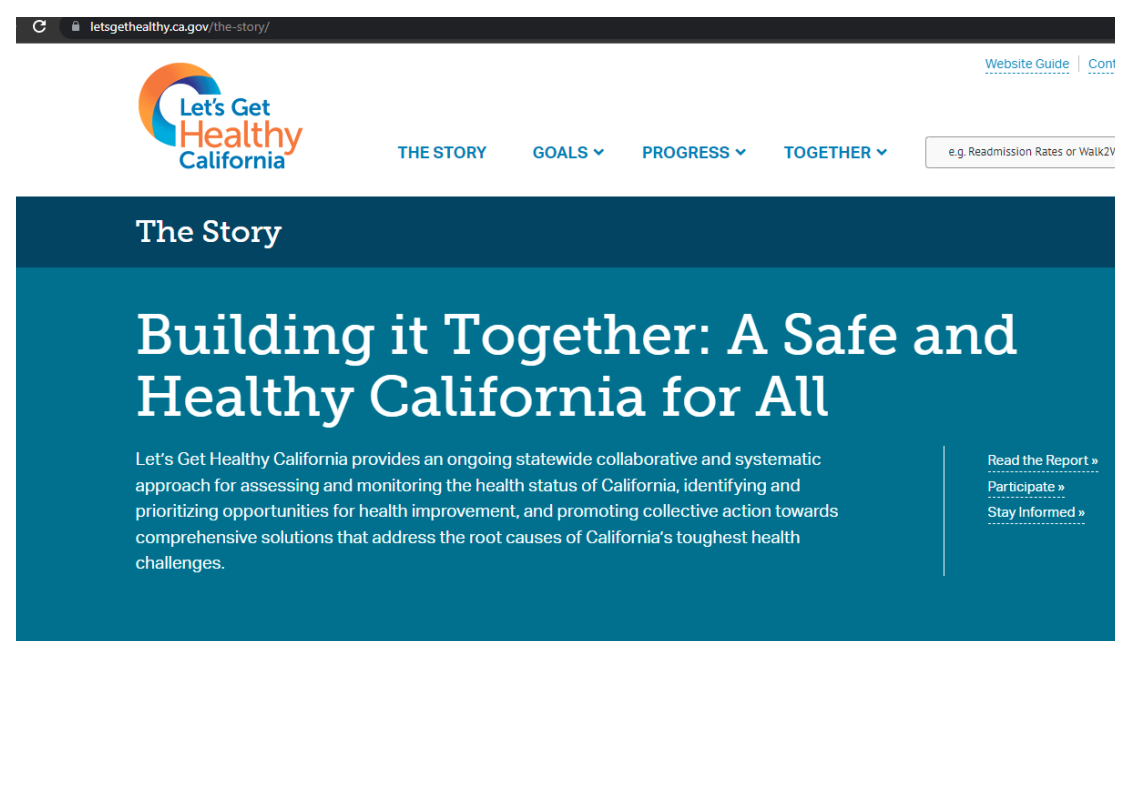

In [2]:
Image(filename='site.png') 

In [3]:
#import dataset 
df=pd.read_csv('depression.csv')

In [4]:
df.head(10)

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
5,2012,Race-Ethnicity,Hispanic,412,923174.0,9.98,8.91,11.05
6,2012,Race-Ethnicity,Asian/Pacific Islander,61,220418.0,5.48,3.92,7.03
7,2012,Race-Ethnicity,Other,36,107786.0,17.34,11.09,23.60
8,2012,Education,No High School Diploma,282,579047.0,14.43,12.60,16.26
9,2012,Education,High School Graduate or GED Certificate,337,665672.0,11.44,9.98,12.89


Side note: Strata = a level or class to which people are assigned according to their social status, education, or income. 
Apparently, used to denote variables in this dataset. 

In [5]:
#if the columns had whitespace, you could use: df.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
# my research questions are simple - I don't need all columns for my purposes. Simplifying the dataframe: 

df = df[['Year', 'Strata Name', 'Frequency']]

In [7]:
df.head()

,Year,Strata Name,Frequency
0,2012,Total,1920
1,2012,Male,561
2,2012,Female,1359
3,2012,White,1314
4,2012,Black,97


In [8]:
print(df.head())

   Year Strata Name  Frequency
0  2012       Total       1920
1  2012        Male        561
2  2012      Female       1359
3  2012       White       1314
4  2012       Black         97


In [9]:
display(df.head())

,Year,Strata Name,Frequency
0,2012,Total,1920
1,2012,Male,561
2,2012,Female,1359
3,2012,White,1314
4,2012,Black,97


In [10]:
df.columns

Index(['Year', 'Strata Name', 'Frequency'], dtype='object')

In [11]:
df.shape

(161, 3)

In [12]:
len(df)

161

In [13]:
df.dtypes

Year            int64
Strata Name    object
Frequency       int64
dtype: object

In [14]:
# use include='all' parameter to display all columns
df.describe(include='all')

,Year,Strata Name,Frequency
count,161.00000,161,161.000000
unique,NaN,23,NaN
top,NaN,Total,NaN
freq,NaN,7,NaN
mean,2015.00000,NaN,429.776398
std,2.00624,NaN,390.297867
min,2012.00000,NaN,28.000000
25%,2013.00000,NaN,186.000000
50%,2015.00000,NaN,314.000000
75%,2017.00000,NaN,511.000000


Looking at the description, we learn that the dataset spans 2012-2018. There are 6 different categories and 23 different subcategories. (strata, strata name unique values). 


In [15]:
df.Year.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         161 non-null    int64 
 1   Strata Name  161 non-null    object
 2   Frequency    161 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB


In [17]:
#value_counts() function displays distinct values for a column 
df["Strata Name"].value_counts()

Total                                      7
< $20,000                                  7
55 to 64                                   7
45 to 54                                   7
35 to 44                                   7
18 to 34                                   7
$100,000+                                  7
$75,000 - $99,999                          7
$50,000 - $74,999                          7
$35,000 - $49,999                          7
$20,000 - $34,999                          7
College Graduate or Post Grad              7
Male                                       7
Some College or Tech School                7
High School Graduate or GED Certificate    7
No High School Diploma                     7
Other                                      7
Asian/Pacific Islander                     7
Hispanic                                   7
Black                                      7
White                                      7
Female                                     7
65+ years 

In [18]:
df.isna().sum()
#identical to df.isnull().sum(), np.isnan(df).sum() 

Year           0
Strata Name    0
Frequency      0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates()

,Year,Strata Name,Frequency
0,2012,Total,1920
1,2012,Male,561
2,2012,Female,1359
3,2012,White,1314
4,2012,Black,97
...,...,...,...
156,2018,18 to 34,496
157,2018,35 to 44,285
158,2018,45 to 54,301
159,2018,55 to 64,432


In [21]:
df_pivoted = df.pivot(
    columns = "Strata Name", 
    index = "Year", 
    values = "Frequency"
).reset_index()

In [22]:
df_pivoted.sort_index()

Strata Name,Year,"$100,000+","$20,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 - $99,999",18 to 34,35 to 44,45 to 54,55 to 64,...,College Graduate or Post Grad,Female,High School Graduate or GED Certificate,Hispanic,Male,No High School Diploma,Other,Some College or Tech School,Total,White
0,2012,270,295,187,250,160,219,240,409,511,...,717,1359,337,412,561,282,36,563,1920,1314
1,2013,213,283,149,186,155,241,198,347,456,...,583,1150,361,403,539,222,28,504,1689,1103
2,2014,178,177,129,107,106,225,163,255,335,...,433,840,209,299,469,172,72,365,1309,832
3,2015,277,258,155,197,150,372,306,321,423,...,607,1196,328,439,652,244,106,556,1848,1143
4,2016,263,215,137,159,120,357,203,314,390,...,550,1055,263,404,590,208,89,451,1645,988
5,2017,296,188,155,192,147,304,209,268,382,...,618,1025,265,394,525,181,110,483,1550,903
6,2018,157,262,192,205,323,496,285,301,432,...,660,1206,337,606,758,241,118,543,1964,1053


In [23]:
years = df_pivoted.Year.unique()
total_population = df_pivoted.Total

In [24]:
print(years)
print(total_population.values)

[2012 2013 2014 2015 2016 2017 2018]
[1920 1689 1309 1848 1645 1550 1964]


### Next steps

- data visualisation - Seaborn, Matplotlib? plot types?
- functions? 
- classes? 
- hypothesis testing? 
- share this notebook / slides or do you want to have a go yourself? 

In [25]:
df_columns = df_pivoted.columns.tolist()[1:]
print(sorted(df_columns))

['$100,000+', '$20,000 - $34,999', '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 - $99,999', '18 to 34', '35 to 44', '45 to 54', '55 to 64', '65+ years', '< $20,000', 'Asian/Pacific Islander', 'Black', 'College Graduate or Post Grad', 'Female', 'High School Graduate or GED Certificate', 'Hispanic', 'Male', 'No High School Diploma', 'Other', 'Some College or Tech School', 'Total', 'White']


In [26]:
incomes_columns = ['< $20,000', '$20,000 - $34,999', '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 - $99,999', '$100,000+']

In [27]:
'''for i in incomes_columns: 
    plt.plot(years, df_pivoted[i])
    plt.title(f'{i} Counts')
    plt.show()
    plt.clf'''

"for i in incomes_columns: \n    plt.plot(years, df_pivoted[i])\n    plt.title(f'{i} Counts')\n    plt.show()\n    plt.clf"

Do Data Quality Checks -
missing value checks,
range checks
completeness checks
precision checks
Compute Summary Statistics - Compute mean , median, standard deviation, min, max, quartiles etc
Visualize - Create bar charts, line plots, scatter plots, fit trend lines
Frame Problems- Think about what problems you can solve with the initial pattern you can see from the plots
Build Models - You can build regression, classification, clustering, forecasting models using the data depending on what problem you are trying to solve

In [28]:
print(years)

[2012 2013 2014 2015 2016 2017 2018]


C:\Users\laura\AppData\Local\Temp/ipykernel_11716/656086301.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])


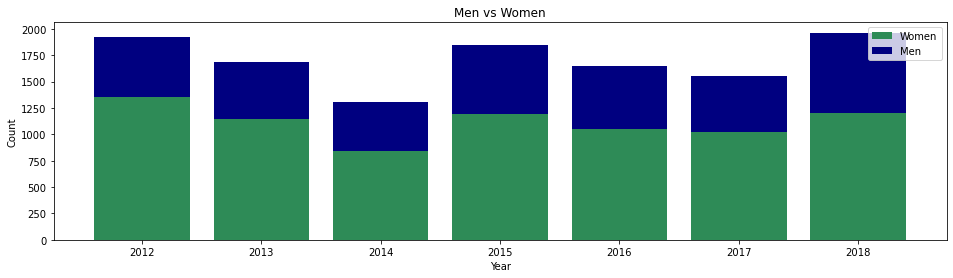

In [29]:
# visualise proportions of men vs women over time
plt.figure(figsize=(16,4))
y_women = df_pivoted.Female
y_men = df_pivoted.Male
x_sex = years
plt.bar(range(len(y_women)), y_women, color='seagreen')
plt.bar(range(len(y_men)), y_men, color='navy',  bottom=y_women)
ax = plt.subplot()
ax.set_xticklabels([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Men vs Women')
plt.legend(['Women', 'Men'])
plt.show()

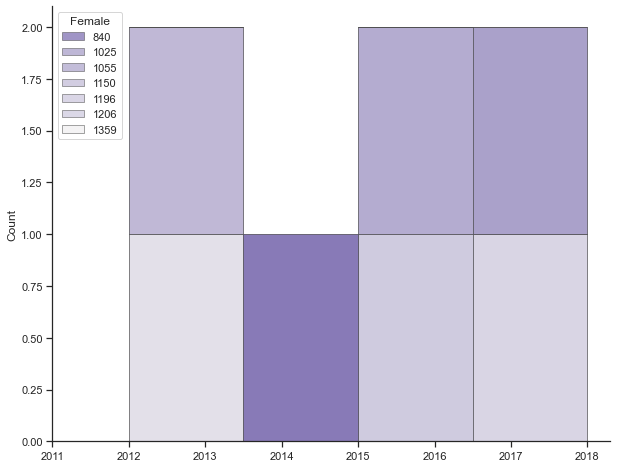

In [30]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)

sns.histplot(
    df_pivoted,
    x=years, hue=y_men,
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

sns.histplot(
    df_pivoted,
    x=years, hue=y_women,
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

Total                                      7
< $20,000                                  7
55 to 64                                   7
45 to 54                                   7
35 to 44                                   7
18 to 34                                   7
$100,000+                                  7
$75,000 - $99,999                          7
$50,000 - $74,999                          7
$35,000 - $49,999                          7
$20,000 - $34,999                          7
College Graduate or Post Grad              7
Male                                       7
Some College or Tech School                7
High School Graduate or GED Certificate    7
No High School Diploma                     7
Other                                      7
Asian/Pacific Islander                     7
Hispanic                                   7
Black                                      7
White                                      7
Female                                     7
65+ years                                  7

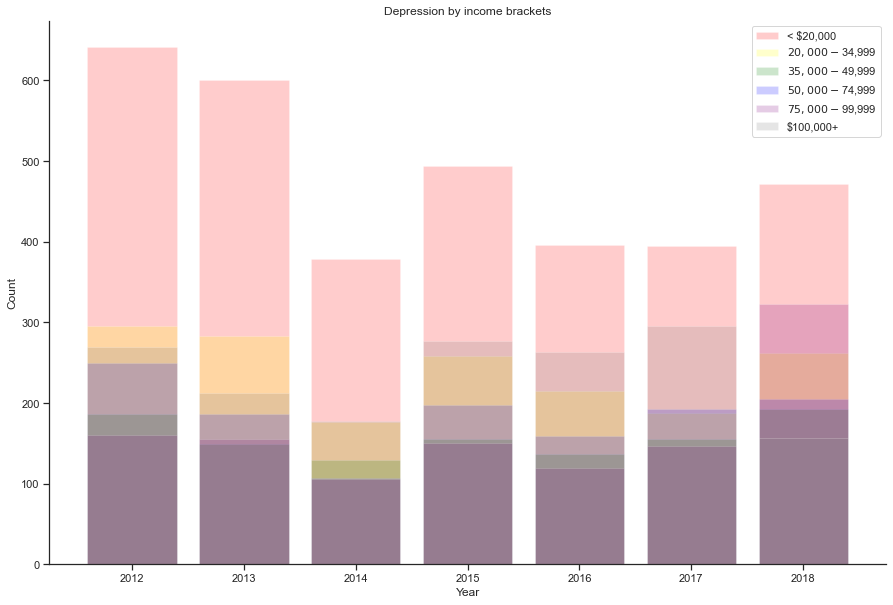

<Figure size 432x288 with 0 Axes>

In [31]:

plt.figure(figsize=(15, 10))
plt.bar(years, df_pivoted['< $20,000'], alpha=0.2, color='red')
plt.bar(years, df_pivoted['$20,000 - $34,999'], alpha=0.2, color='yellow')
plt.bar(years, df_pivoted['$35,000 - $49,999'], alpha=0.2, color='green')
plt.bar(years, df_pivoted['$50,000 - $74,999'], alpha=0.2, color='blue')
plt.bar(years, df_pivoted['$75,000 - $99,999'], alpha=0.2, color='purple')
plt.bar(years, df_pivoted['$100,000+'], alpha=0.2, color='gray')


sns.set_theme(style="ticks")
sns.despine()


plt.legend(['< $20,000', '$20,000 - $34,999', '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 - $99,999', '$100,000+'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Depression by income brackets')
plt.show()
plt.clf()

In [32]:
'''sns.jointplot(data=df_pivoted, x="Year", y='< $20,000')
sns.jointplot(data=df_pivoted, x="Year", y='$20,000 - $34,999')'''

'sns.jointplot(data=df_pivoted, x="Year", y=\'< $20,000\')\nsns.jointplot(data=df_pivoted, x="Year", y=\'$20,000 - $34,999\')'

In [33]:
'''sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df_pivoted,
    x="Year", y="$20,000 - $34,999", hue="$20,000 - $34,999",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")'''

'sns.set_theme()\n\n# Plot sepal width as a function of sepal_length across days\ng = sns.lmplot(\n    data=df_pivoted,\n    x="Year", y="$20,000 - $34,999", hue="$20,000 - $34,999",\n    height=5\n)\n\n# Use more informative axis labels than are provided by default\ng.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")'

In [34]:
'''sns.catplot(x = 'Year', y='< $20,000', data=df_pivoted, kind='bar')
sns.catplot(x = 'Year', y='$20,000 - $34,999', data=df_pivoted, kind='bar')
sns.catplot(x = 'Year', y='$35,000 - $49,999', data=df_pivoted, kind='bar')

plt.show()'''

"sns.catplot(x = 'Year', y='< $20,000', data=df_pivoted, kind='bar')\nsns.catplot(x = 'Year', y='$20,000 - $34,999', data=df_pivoted, kind='bar')\nsns.catplot(x = 'Year', y='$35,000 - $49,999', data=df_pivoted, kind='bar')\n\nplt.show()"

In [35]:
#plt.plot(years, df_pivoted['< $20,000'])

In [36]:
'''sns.catplot(x="Year", y="< $20,000", data=df_pivoted)'''

'sns.catplot(x="Year", y="< $20,000", data=df_pivoted)'

In [37]:
'''sns.scatterplot(
    x='Year',
    y='< $20,000'
    data=df_pivoted,  
)
# both, hue and size are optional
sns.despine() # prettier layout'''

"sns.scatterplot(\n    x='Year',\n    y='< $20,000'\n    data=df_pivoted,  \n)\n# both, hue and size are optional\nsns.despine() # prettier layout"

In [38]:
'''
sns.set_theme(style="whitegrid")


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df_pivoted, palette=, bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)'''

'\nsns.set_theme(style="whitegrid")\n\n\n# Set up the matplotlib figure\nf, ax = plt.subplots(figsize=(11, 6))\n\n# Draw a violinplot with a narrower bandwidth than the default\nsns.violinplot(data=df_pivoted, palette=, bw=.2, cut=1, linewidth=1)\n\n# Finalize the figure\nax.set(ylim=(-.7, 1.05))\nsns.despine(left=True, bottom=True)'

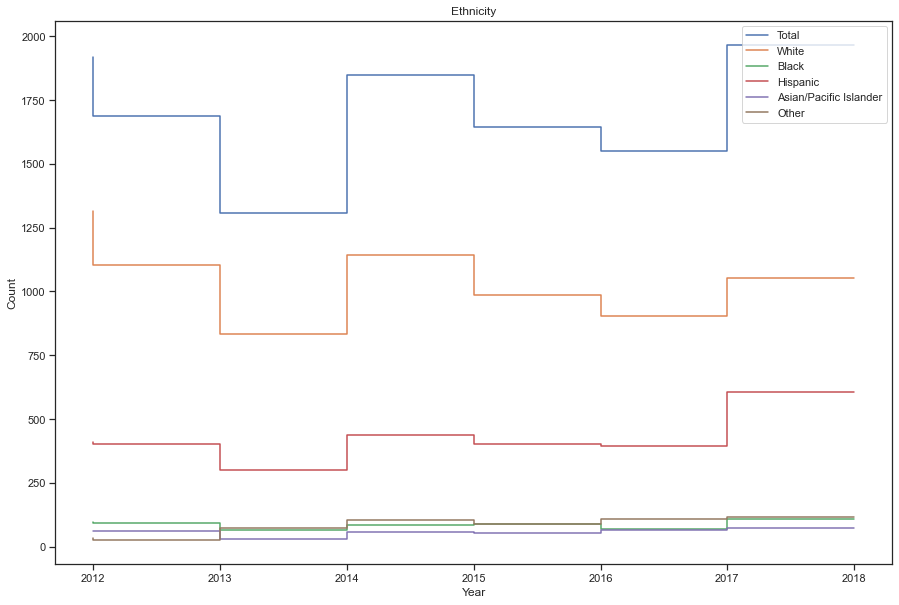

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(15, 10))

plt.tight_layout()

plt.step(years, df_pivoted['Total'])
plt.step(years, df_pivoted['White'])
plt.step(years, df_pivoted['Black'])
plt.step(years, df_pivoted['Hispanic'])
plt.step(years, df_pivoted['Asian/Pacific Islander'])
plt.step(years, df_pivoted['Other'])

plt.legend(['Total', 'White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Other'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Ethnicity')
plt.show()
plt.clf()

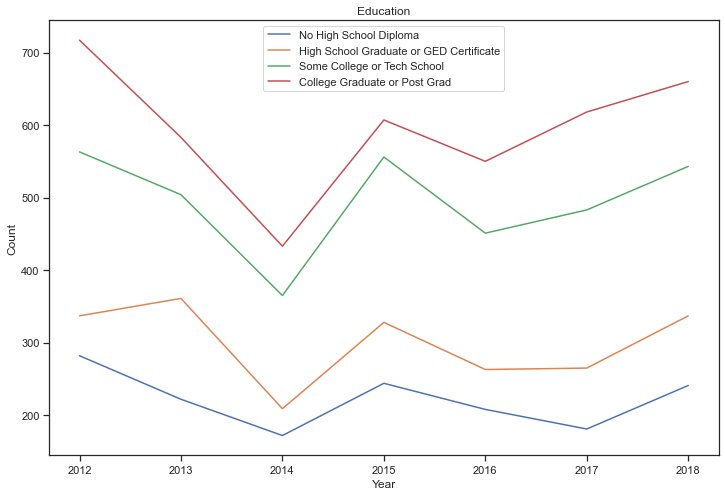

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(years, df_pivoted['No High School Diploma'], )
plt.plot(years, df_pivoted['High School Graduate or GED Certificate'])
plt.plot(years, df_pivoted['Some College or Tech School'])
plt.plot(years, df_pivoted['College Graduate or Post Grad'])

plt.legend(['No High School Diploma', 'High School Graduate or GED Certificate', 'Some College or Tech School', 'College Graduate or Post Grad', ])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Education')
plt.show()
plt.clf()

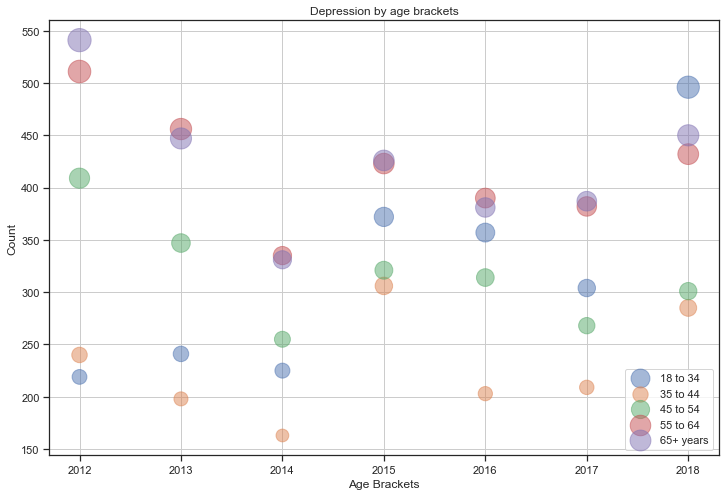

<Figure size 432x288 with 0 Axes>

In [41]:

plt.figure(figsize=(12, 8))

plt.scatter(years, df_pivoted['18 to 34'], s=df_pivoted['18 to 34'], alpha=0.5)
plt.scatter(years, df_pivoted['35 to 44'], s=df_pivoted['35 to 44'], alpha=0.5)
plt.scatter(years, df_pivoted['45 to 54'], s=df_pivoted['45 to 54'], alpha=0.5)
plt.scatter(years, df_pivoted['55 to 64'], s=df_pivoted['55 to 64'], alpha=0.5)
plt.scatter(years, df_pivoted['65+ years'], s=df_pivoted['65+ years'], alpha=0.5)

plt.legend(['18 to 34', '35 to 44', '45 to 54', '55 to 64', '65+ years', ])
plt.xlabel('Age Brackets')
plt.ylabel('Count')
plt.title('Depression by age brackets')
ax = plt.subplot()
ax.grid(True)
plt.show()
plt.clf()

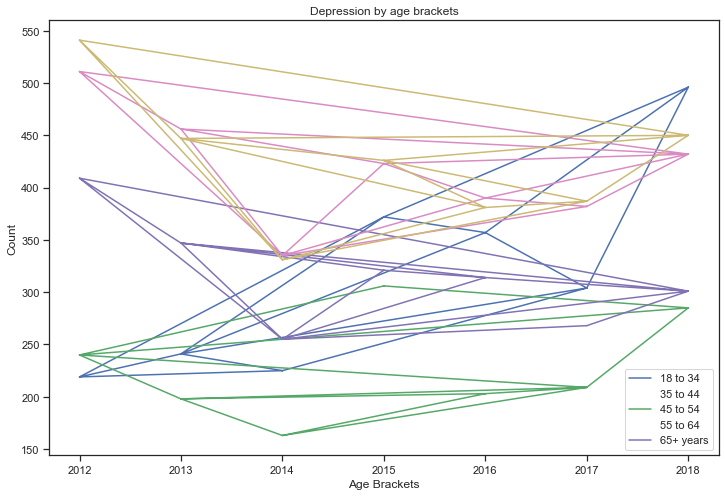

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(12, 8))

plt.triplot(years, df_pivoted['18 to 34'])
plt.triplot(years, df_pivoted['35 to 44'])
plt.triplot(years, df_pivoted['45 to 54'])
plt.triplot(years, df_pivoted['55 to 64'])
plt.triplot(years, df_pivoted['65+ years'])

plt.legend(['18 to 34', '35 to 44', '45 to 54', '55 to 64', '65+ years', ])
plt.xlabel('Age Brackets')
plt.ylabel('Count')
plt.title('Depression by age brackets')
plt.show()
plt.clf()



In [ ]:
# added graphics